In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.utils import load_cifar10
from modules.cnn_with_spectral_pooling import CNN_Spectral_Pool

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [9]:
xtrain, ytrain, xtest, ytest = load_cifar10(5, get_test_data=True, channels_last=False)

file already downloaded..
getting batch 1
getting batch 2
getting batch 3
getting batch 4
getting batch 5


In [10]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 3, 32, 32), (50000,), (10000, 3, 32, 32), (10000,))

In [4]:
# # take a small batch for testing architecture
sample_size = 8192
sampleind = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_sample = xtrain[sampleind]
ytrain_sample = ytrain[sampleind]
assert len(np.unique(ytrain_sample)) == 10
xtrain_sample.shape

(2048, 3, 32, 32)

## test build graph:

In [ ]:
validation_size = 1024

cnn = CNN_Spectral_Pool(M=8,verbose=True,learning_rate=1e-3, l2_norm=0.01, lr_reduction_epochs=[150,200], gamma=0.85)
tf.reset_default_graph()
cnn.train(xtrain[:-validation_size],
          ytrain[:-validation_size],
          xtrain[-validation_size:],
          ytrain[-validation_size:],
          batch_size=128,
          epochs=250,
          extra_conv_layer=True
)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 24
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (21,21) | Freq Dropout: 8
Adding conv layer 3 | Input size: 21 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 21 | filter size: (17,17) | Freq Dropout: 6
Adding conv layer 4 | Input size: 17 | Input channels: 192 | #filters: 224 | filter size: 3
Adding spectral pool layer 4 | Input size: 17 | filter size: (13,13) | Freq Dropout: 4
Adding conv layer 5 | Input size: 13 | Input channels: 224 | #filters: 256 | filter size: 3
Adding spectral pool layer 5 | Input size: 13 | filter size: (11,11) | Freq Dropout: 12
Adding conv layer 6 | Input size: 11 | Input channels: 256 | #filters: 288 | filter 

__Note:__ in the above output, train acc is not same as validation acc even though they are the same because of dropout applied in train and not in validation

In [8]:
cnn.calc_test_accuracy(xtrain_sample, ytrain_sample)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 10
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (21,21) | Freq Dropout: 8
Adding conv layer 3 | Input size: 21 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 21 | filter size: (17,17) | Freq Dropout: 12
Adding conv layer 4 | Input size: 17 | Input channels: 192 | #filters: 192 | filter size: 1
Adding conv layer 5 | Input size: 17 | Input channels: 192 | #filters: 10 | filter size: 1
Adding final softmax layer using global averaging
Loading pre-trained model
INFO:tensorflow:Restoring parameters from model/test
Test accuracy: 18.750


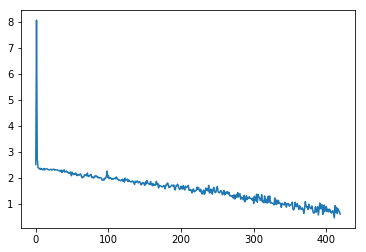

In [7]:
plt.plot(cnn.train_loss)

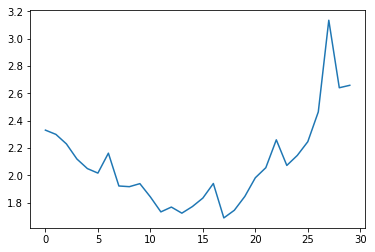

In [8]:
plt.plot(cnn.val_loss)

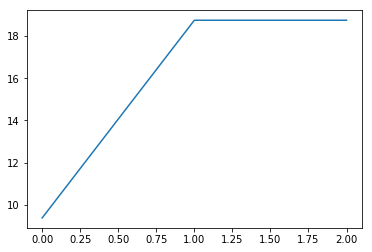

In [10]:
plt.plot(cnn.train_accuracy)

In [54]:
# show the graph
from modules.utils import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/test.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [18]:
c

2

In [36]:
x = np.reshape(np.arange(120, dtype=np.float32), (5,4,3,2))

In [37]:
x

array([[[[   0.,    1.],
         [   2.,    3.],
         [   4.,    5.]],

        [[   6.,    7.],
         [   8.,    9.],
         [  10.,   11.]],

        [[  12.,   13.],
         [  14.,   15.],
         [  16.,   17.]],

        [[  18.,   19.],
         [  20.,   21.],
         [  22.,   23.]]],


       [[[  24.,   25.],
         [  26.,   27.],
         [  28.,   29.]],

        [[  30.,   31.],
         [  32.,   33.],
         [  34.,   35.]],

        [[  36.,   37.],
         [  38.,   39.],
         [  40.,   41.]],

        [[  42.,   43.],
         [  44.,   45.],
         [  46.,   47.]]],


       [[[  48.,   49.],
         [  50.,   51.],
         [  52.,   53.]],

        [[  54.,   55.],
         [  56.,   57.],
         [  58.,   59.]],

        [[  60.,   61.],
         [  62.,   63.],
         [  64.,   65.]],

        [[  66.,   67.],
         [  68.,   69.],
         [  70.,   71.]]],


       [[[  72.,   73.],
         [  74.,   75.],
         [  76.,   7

In [38]:
with tf.Session() as sess:
    print(sess.run(tf.reduce_mean(tf.constant(x), axis=(2,3))))

[[   2.5    8.5   14.5   20.5]
 [  26.5   32.5   38.5   44.5]
 [  50.5   56.5   62.5   68.5]
 [  74.5   80.5   86.5   92.5]
 [  98.5  104.5  110.5  116.5]]


In [31]:
x.shape

(8, 2, 2, 2)